In [2]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12i_res7100_mhdcv'
simtype="fire2"
#simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/mhdcv/m12i_res7100_mhdcv/1Myr/sf-fire3/'
datapath="./"+simtype+"_data_pkl/" #this is teh path where the data of our tracked clusters is
gas_datapath="./"+simtype+"_gas_data_pkl/"


plot_path="./"+simtype+"_plots_with_gas/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

snap=650 #this is the snapshot at which the clusters were taken from using the fof algorithm I am using this to extract information from the snapshot where the clusters were first seen
snapshot_start=650  #snapshot to begin creating the figure
snapshot_end=650    #snapshot to stop at


############################
############################
#Doing all this trouble to store the initial mass of the clusters
fn="fire2_associations_at_snapshot_"+str(snap)+".pkl"  #snap determines where the cluster was taken from
with open(datapath+fn, "rb") as input:
  initial_cluster_data = pickle.load(input)

clustermass=[]   #it stores the mass of each cluster that was in the beginning

for c in range(len(initial_cluster_data)):
    m=np.sum(initial_cluster_data[c+1]["mass_tracked"])
    clustermass.append(m)
print("These are the initial mass of each star in the cluster",clustermass)
############################
############################


################################
################################
#This section is just to create a list of clusters and display a print like this: These are the clusters groups we have tracked data of:
#['snapshot660_cluster_group1', 'snapshot660_cluster_group2', 'snapshot660_cluster_group3', 'snapshot660_cluster_group4', 'snapshot660_cluster_group5', 
#'snapshot660_cluster_group6', 'snapshot660_cluster_group7', 'snapshot660_cluster_group8', 'snapshot660_cluster_group9', 'snapshot660_cluster_group10']
cluster_groupid=[]
total_clusters=len(initial_cluster_data)
for i in range(total_clusters):
    cluster_groupid.append("snapshot"+str(snapshot_start)+"_cluster_group"+str(i+1))

print("These are the clusters groups we have tracked data of:\n",cluster_groupid)
##############################
##############################
n=snapshot_end-snapshot_start+1 # total no. of snapshots to generate image 

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

#total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
############################
############################

These are the initial mass of each star in the cluster [222846.2, 219264.66, 155291.19, 152975.95, 148654.28, 134905.92, 105249.55, 71458.91, 78569.75, 60811.26, 55407.582, 59694.777, 53884.133, 69880.11, 72583.89, 58296.867, 55620.633, 58363.273, 52382.902, 54975.43, 54473.38, 41988.137, 48610.79, 50871.062, 41328.766, 53030.258]
These are the clusters groups we have tracked data of:
 ['snapshot650_cluster_group1', 'snapshot650_cluster_group2', 'snapshot650_cluster_group3', 'snapshot650_cluster_group4', 'snapshot650_cluster_group5', 'snapshot650_cluster_group6', 'snapshot650_cluster_group7', 'snapshot650_cluster_group8', 'snapshot650_cluster_group9', 'snapshot650_cluster_group10', 'snapshot650_cluster_group11', 'snapshot650_cluster_group12', 'snapshot650_cluster_group13', 'snapshot650_cluster_group14', 'snapshot650_cluster_group15', 'snapshot650_cluster_group16', 'snapshot650_cluster_group17', 'snapshot650_cluster_group18', 'snapshot650_cluster_group19', 'snapshot650_cluster_group20',

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

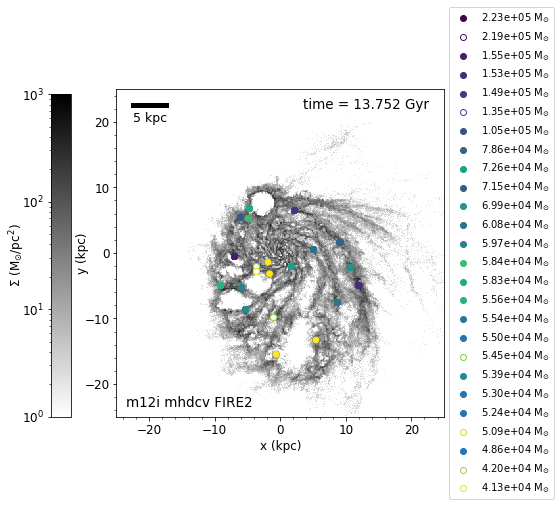

In [3]:
plot_count=0       #counts the plot as we move forward with each snapshot
snapshot_list=np.arange(snapshot_start,snapshot_end+1) #create a list of snapshot numbers to plot to plot eg. [596,597, ...]
time=snapshot_list-snapshot_start #time starts from zero here where t=0 is at the snapshot where we start from eg. [0,1,2,3,....]
#time=[[0],[20],[40],[60],[80],[100]] #another way of providing fixed time stamps to look at

tracked_gas_all_snaps={}
for i in range(len(time)):                              
    snapnumber=time[i]+snapshot_start      #this is the true snapshot number each time
    tracked_gas={} 
    ###################
    
    viridis = plt.get_cmap("viridis")
    colors = iter(viridis(np.linspace(0,1,total_clusters))) #number of clusters
    file_name="fire2_associations_at_snapshot_"+str(snapnumber)+".pkl"
    cluster_file_name="fire2_associations_m12i_res7100_mhdcv_snapshot_650.pkl"
    #print("\n#################\nReading cluster data from the file: ",file_name)
    with open(datapath+file_name, "rb") as input:
        importdata = pickle.load(input)
    
    with open(datapath+cluster_file_name,"rb") as input:
        import_cluster=pickle.load(input)
    #loading data from each snapshot into importdata
    ##################
    ##################
    fig1=plt.figure()
    fig1.set_size_inches(7,7)
    ax=fig1.add_axes([0.17, 0.185, 0.65, 0.65]) #left, bottom, width, height
    cluster_count=0   #reset cluster_count to 0 as the j loop scans through all clusters to create a plot for given snapshot but i loop is for next snapshot
    for j in range(total_clusters):  #total_clusters tells us how many clusters to look for
        
        x=importdata[cluster_count+1]["x_tracked"]
        y=importdata[cluster_count+1]["y_tracked"]
        xcm=importdata[cluster_count+1]["xcm"]
        ycm=importdata[cluster_count+1]["ycm"]
        z=importdata[cluster_count+1]["z_tracked"]
        embedded_check=import_cluster[cluster_count+1]["is_embedded"]
        #cluster_mass=np.sum(importdata[cluster_count+1]["mass_tracked"]) #do this to take into account the mass in each cluster
        #cluster_mass_initial=np.sum(initial_cluster_data[cluster_count+1]["mass_tracked"])
        if embedded_check==True:
            #s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=colors[cluster_count])
            s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=next(colors))
        else:
            #s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',edgecolor=colors[cluster_count],facecolor="white")
            s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',edgecolor=next(colors),facecolor="white")
        
        #s1=ax.scatter(x,y,label=f'{clustermass[cluster_count]:.2e}'+' M$_{{\odot}}$',c=next(colors)) #use this if no. of clusters is large
        #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
        ax.minorticks_on()
        ax.tick_params(labelsize=12)
        ax.set_xlabel("x (kpc)",fontsize=12,labelpad=3)
        ax.set_ylabel("y (kpc)",fontsize=12,labelpad=-5)
        #time_label= 'time = ' + f'{snaptime:.3f}' + ' Gyr'
        #ax.set_title("Clusters at T="+str(time[plot_count])+" in Myr")
        #ax.set_title("Clusters at "+time_label)
        cluster_count+=1
    
    handles,labels = ax.get_legend_handles_labels()
    sorted_handles= [x for _,x in sorted(zip(clustermass,handles),reverse=True)] #sort the handles (the colors next to the labels) based on clustermass
    sorted_legends= [x for _,x in sorted(zip(clustermass,labels),reverse=True)] #sort the labels based on the clustermass which is a list
    ax.legend(sorted_handles,sorted_legends,bbox_to_anchor=(1,0.5), loc='center left')
    
    #plt.tight_layout()
    '''
    part = gizmo.io.Read.read_snapshots(['all'],'snapshot_index', time[i]+snapshot_start, simulation_name=simname, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)  
    t = np.max(part['star'].prop('form.time'))  
    
    rGas = part['gas'].prop('host.distance.principal.cylindrical')[:,0]
    zGas = part['gas'].prop('host.distance.principal.cylindrical')[:,1]
    
    xGas = part['gas'].prop('host.distance.principal.cartesian')[:,0]
    yGas = part['gas'].prop('host.distance.principal.cartesian')[:,1]
    zGas = part['gas'].prop('host.distance.principal.cartesian')[:,2]
    
    vxGas = part['gas'].prop('host.velocity.principal.cartesian')[:,0]
    vyGas = part['gas'].prop('host.velocity.principal.cartesian')[:,1]
    vzGas = part['gas'].prop('host.velocity.principal.cartesian')[:,2]
    
    mGas = part['gas']['mass']
    rhoGas = part['gas']['density']
    tGas = part['gas']['temperature']
    idGas = part['gas']['id']
    
    i_gas = np.where((rGas <= bin_edge) & (np.fabs(zGas) <= 1.5) & (part['gas']['density']*((MsunToGm/KpcToCm**3)/mp) >= 10.) & (tGas <= 1e4))
    
    x = xGas[i_gas]
    y = yGas[i_gas]
    z = zGas[i_gas]
    vx = vxGas[i_gas]
    vy = vyGas[i_gas]
    vz = vzGas[i_gas]
    m = mGas[i_gas]
    rho = part['gas'].prop('number.density')[i_gas]
    id = part['gas']['id'][i_gas]
    
    ###########################################################################
    #gas image (2d histogram)
    ###########################################################################
    #cold (< 10^4 K) gas in the midplane (|z| <= 1.5 kpc within bin_edge
    v =  np.where((rGas <= bin_edge) & (np.fabs(zGas) <= 1.5) & (tGas <= 1e4))
    face, xh, yh = np.histogram2d(part['gas'].prop('host.distance.principal.cartesian')[v,1][0],part['gas'].prop('host.distance.principal.cartesian')[v,0][0],bins=[bins,bins], weights=part['gas']['mass'][v])

    ###########################################################################

    
    tracked_gas={"v":v,"face":face,"xh":xh,"yh":yh}
    
    file_name=simtype+"gas_data_snapshot_"+str(snapnumber)+".pkl"
    with open(gas_datapath+file_name, 'wb') as output:
      pickle.dump(tracked_gas, output)
    print("\n Stored the gas data for background plot of in the snapshot no.",snap,"to filename:",file_name,"\n#####\n")
    print(tracked_gas)
    tracked_gas_all_snaps.update({snapnumber:tracked_gas})
    '''
    ##################
    ##################
    #Loading the gas data
    file_name=simtype+"_gas_data"+str(snapnumber)+".pkl"
    #print("\nReading gas data from the file: ",file_name)
    with open(gas_datapath+file_name, "rb") as input:
      import_gasdata = pickle.load(input)
    
    v=import_gasdata["v"]
    face=import_gasdata["face"]
    xh=import_gasdata["xh"]
    yh=import_gasdata["yh"]
    snaptime=import_gasdata["snaptime"]
    norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
    im = ax.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 
    

    #colorbar for the background gas density
    cmap_gray = matplotlib.cm.get_cmap('binary')
    norm1 = matplotlib.colors.LogNorm(vmin=1,vmax=1000)
    cbar_ax1 = fig1.add_axes([0.04, 0.185, 0.04, 0.64]) # position of gray colorbar (left, bottom, width, height)
    cb1 = fig1.colorbar(im, cax=cbar_ax1, ticklocation='left')
    cb1.set_label('$\Sigma$ (M$_{{\odot}}$/pc$^2$)', labelpad=-5, fontsize=12)
    #plot a scale bar 5 kpc long
    ax.plot([-22.5,-17.5], [22.5,22.5], 'k-', linewidth=5)
    label1 = "5 kpc"
    ax.text(-22.5, 20, label1, fontsize=12.5)
    
    #label the name of the galaxy on plot 
    #label_simname="m12i mhdcv"
    #ax.text(10,-23.5,label_simname,fontsize=13.5)
    label2="m12i mhdcv "+simtype.upper() 
    ax.text(-23.5,-23.5,label2,fontsize=13.5) 
    
    #label the time from the snapshot_times.txt file
    label3 = 'time = ' + f'{snaptime:.3f}' + ' Gyr'
    ax.text(3.5,22,label3,fontsize=13.5) #display at the top right  
    #ax.text(-23.5,-21,label3,fontsize=13.5) #display time on the bottom left above simtype
    plot_name=simtype+"_m12i_gas_and_associations"+str(plot_count+snapshot_start)+".png"
    fig1.savefig(plot_path+plot_name,bbox_inches='tight',dpi=200)
    print("Generated the plot and saved the figure as: ",plot_name,end="\r",flush=True)
    #print("###################\n")
    plot_count+=1
    plt.show()
    fig1.clf()
    #plt.tight_layout()
    plt.close()


In [9]:
from PIL import Image
#import glob  #use it if you want to read all certain file type
    
imgs=[]
for i in range(596,691): #startig and ending value+1 of the index that identifies different file names or imgs = glob.glob("*.png") can do done as well
    filename=simtype+"_gas_and_clusters"+str(i)+".png"
    imgs.append(plot_path+filename)
    print("Scanned image from the File: ",filename,end="\r",flush=True)    

frames = []
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
# Save into a GIF file that loops forever
gifname=simtype+".gif"
frames[0].save(plot_path+gifname, format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=200, loop=0)    #duration =200 looked good
print("\nSaved the GIF into the File: ",gifname)

Scanned image from the File:  fire2_gas_and_clusters690.png
Saved the GIF into the File:  fire2.gif


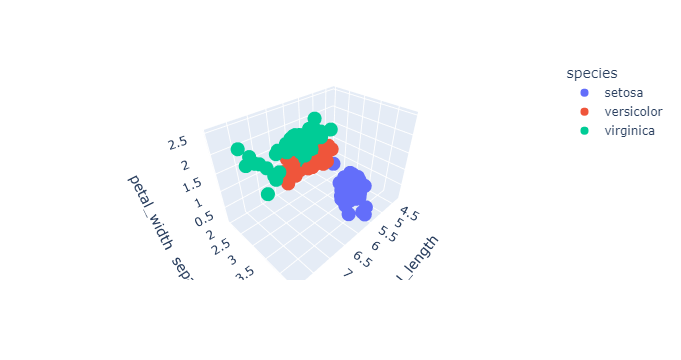